In [39]:
import numpy as np
import matplotlib.pyplot as plt

## 生成数据

In [40]:
true_w, true_b = np.array([-2.0, 2.9]), 0.5
x = np.random.randn(100).reshape(-1, 2)
y = x @ true_w + true_b

In [41]:
y = np.array([1 if v > 0 else 0 for v in y])

In [42]:
decision_x = np.linspace(-3, 3, 100)
decision_y = - (true_b + true_w[0] * decision_x) / true_w[-1]

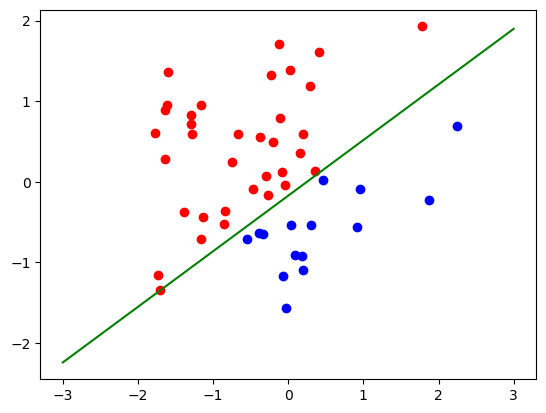

In [43]:
plt.scatter(*x[y == 1].T, c='r')
plt.scatter(*x[y == 0].T, c='b')
plt.plot(decision_x, decision_y, c='g')
plt.show()

In [44]:
x.shape

(50, 2)

In [45]:
_x = np.hstack([x, np.ones((x.shape[0], 1))])
_y = y.reshape(-1, 1)
_x.shape, _y.shape

((50, 3), (50, 1))

## 初始化参数

In [46]:
w = np.random.normal(0, 0.1, size=_x.shape[-1]).reshape(-1, 1)
w

array([[ 0.05468748],
       [ 0.04848159],
       [-0.02948259]])

## 代价函数

In [47]:
y_hat = 1 / (1 + np.exp(-_x @ w))

In [48]:
J = (- _y * np.log(y_hat) - (1 - _y) * np.log(1 - y_hat)).mean()
J_w = ((y_hat - _y) * _x).mean(axis=0).reshape(-1, 1)
J_w.shape, w.shape

((3, 1), (3, 1))

## 梯度下降

In [49]:
alpha = 0.3
epochs = 1000

In [50]:
cost_lst = []
for epoch in range(epochs):
    y_hat = 1 / (1 + np.exp(-_x @ w))
    J = (- _y * np.log(y_hat) - (1 - _y) * np.log(1 - y_hat)).mean()
    J_w = ((y_hat - _y) * _x).mean(axis=0).reshape(-1, 1)
    w = w - alpha * J_w
    cost_lst.append(J)

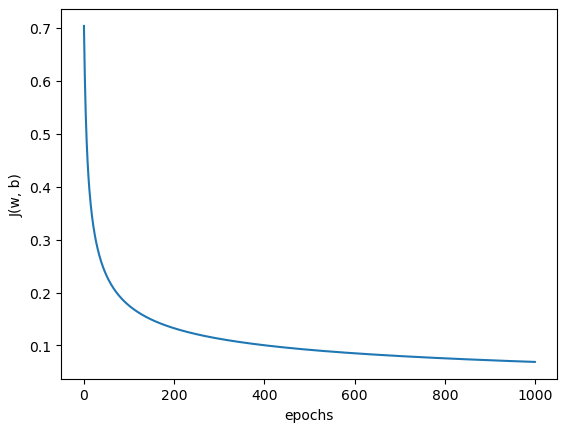

In [51]:
plt.plot(range(epochs), cost_lst)
plt.xlabel('epochs')
plt.ylabel('J(w, b)')
plt.show()

In [52]:
w, true_w, true_b

(array([[-4.98830993],
        [ 6.20273556],
        [ 1.29466198]]),
 array([-2. ,  2.9]),
 0.5)

In [53]:
decision_x = np.linspace(-3, 3, 100)
_decision_y = - (w[-1][0] + w[0][0] * decision_x) / w[1][0]

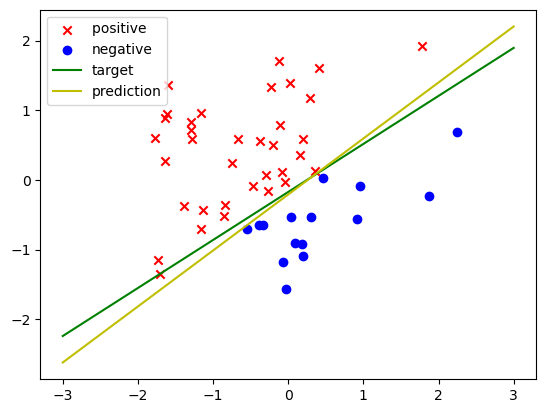

In [54]:
plt.scatter(*x[y == 1].T, c='r', marker='x', label='positive ')
plt.scatter(*x[y == 0].T, c='b', marker='o', label='negative')
plt.plot(decision_x, decision_y, c='g', label='target')
plt.plot(decision_x, _decision_y, c='y', label='prediction')
plt.legend()
plt.show()

# 使用平方误差损失函数版梯度下降

In [ ]:
alpha = 0.3
epochs = 5000
w = np.random.normal(0, 0.1, size=_x.shape[-1]).reshape(-1, 1)

In [ ]:
cost_lst = []
for epoch in range(epochs):
    y_hat = 1 / (1 + np.exp(-_x @ w))
    J = 1/2 * ((y_hat- _y)**2).mean()
    J_w =  ((y_hat - _y) * (_x @ w) * np.exp(-_x @ w) * _x * (y_hat**2)).mean(axis=0).reshape(-1, 1)
    w = w - alpha * J_w
    cost_lst.append(J)

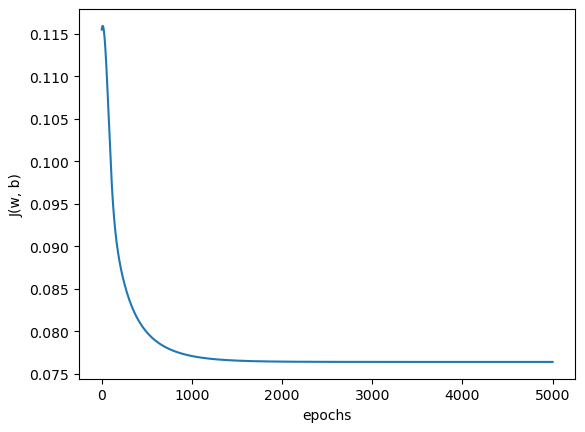

In [ ]:
plt.plot(range(epochs), cost_lst)
plt.xlabel('epochs')
plt.ylabel('J(w, b)')
plt.show()

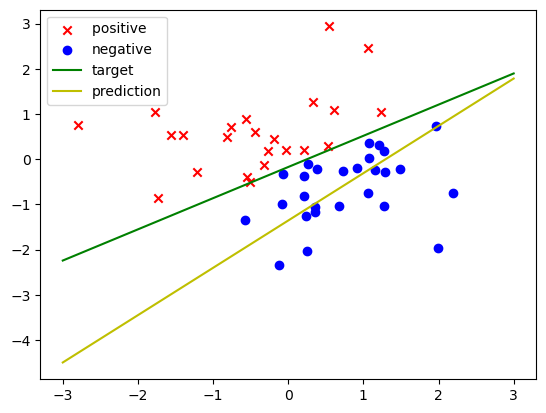

In [ ]:
decision_x = np.linspace(-3, 3, 100)
_decision_y = - (w[-1][0] + w[0][0] * decision_x) / w[1][0]
plt.scatter(*x[y == 1].T, c='r', marker='x', label='positive ')
plt.scatter(*x[y == 0].T, c='b', marker='o', label='negative')
plt.plot(decision_x, decision_y, c='g', label='target')
plt.plot(decision_x, _decision_y, c='y', label='prediction')
plt.legend()
plt.show()